<a href="https://www.kaggle.com/code/sudhirsingh108/eda-and-data-analysis-of-top-1000-youtube-channel?scriptVersionId=126924285" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#  Exploratory Data Analysis EDA and Visulization of top 1000 Youtube Channel

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/most-subscribed-1000-youtube-channels/topSubscribed.csv


In [2]:
df = pd.read_csv("/kaggle/input/most-subscribed-1000-youtube-channels/topSubscribed.csv")
df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


###  Dataset features

this data_set consists of 6 variables.

Rank - Rank of channel

Youtube Channel - Name of Youtube_Channel

Subscribers - Channel subscriber count

Video Views - Total views of channel

Video Count - Total videos in particular channel

Category - Category of channel

Started - Starting year of channel

## Data Preprocessing

In [3]:
df.shape

(1000, 7)

Conclusion -this data_set has 1000 rows and 7 columns

In [4]:
df.dtypes

Rank                int64
Youtube Channel    object
Subscribers        object
Video Views        object
Video Count        object
Category           object
Started             int64
dtype: object

Conclusion - some columns has string data types ,it should be int types

In [5]:
df["Subscribers"] = df["Subscribers"].str.replace(",","").astype(int)
df["Video Views"] = df["Video Views"].str.replace(",","").astype(int)
df["Video Count"] = df["Video Count"].str.replace(",","").astype(int)

df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,4,SET India,150000000,137828094104,103200,Shows,2006
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012


In [6]:
df.dtypes

Rank                int64
Youtube Channel    object
Subscribers         int64
Video Views         int64
Video Count         int64
Category           object
Started             int64
dtype: object

In [7]:
df['Category'].unique()

array(['Music', 'Film & Animation', 'Education', 'Shows', 'Entertainment',
       'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels',
       'Gaming', 'People & Blogs', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

Note - in category coloumn url should be removed

In [8]:
df = df[df['Category'] != "https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels"]
df.Category.unique()

array(['Music', 'Film & Animation', 'Education', 'Shows', 'Entertainment',
       'Gaming', 'People & Blogs', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [9]:
df = df.drop(["Rank"], axis = 1)
df.head()

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,T-Series,234000000,212900271553,18515,Music,2006
1,YouTube Movies,161000000,0,0,Film & Animation,2015
2,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,SET India,150000000,137828094104,103200,Shows,2006
4,MrBeast,128000000,21549128785,733,Entertainment,2012


In [10]:
df.isnull().sum()

Youtube Channel    0
Subscribers        0
Video Views        0
Video Count        0
Category           0
Started            0
dtype: int64

Note - in this data_set no null value is inclueded

## EDA and Visualization

In [11]:
df.groupby("Category").describe().T

Category           Autos & Vehicles        Comedy     Education  \
Subscribers count      1.000000e+00  6.800000e+01  4.500000e+01   
            mean       1.890000e+07  1.847647e+07  2.519111e+07   
            std                 NaN  7.596015e+06  2.323246e+07   
            min        1.890000e+07  1.160000e+07  1.140000e+07   
            25%        1.890000e+07  1.292500e+07  1.360000e+07   
            50%        1.890000e+07  1.635000e+07  1.810000e+07   
            75%        1.890000e+07  1.990000e+07  2.760000e+07   
            max        1.890000e+07  4.400000e+07  1.520000e+08   
Video Views count      1.000000e+00  6.800000e+01  4.500000e+01   
            mean       7.666148e+09  6.244004e+09  1.418033e+10   
            std                 NaN  5.221284e+09  2.338476e+10   
            min        7.666148e+09  6.118664e+08  3.825084e+06   
            25%        7.666148e+09  2.750115e+09  3.361881e+09   
            50%        7.666148e+09  4.340215e+09  6.926902e+09   
            75%        7.666148e+09  8.414210e+09  1.395992e+10   
            max        7.666148e+09  3.031764e+10  1.490842e+11   
Video Count count      1.000000e+00  6.800000e+01  4.500000e+01   
            mean       2.908000e+03  1.440353e+03  2.936000e+03   
            std                 NaN  3.485647e+03  9.066298e+03   
            min        2.908000e+03  4.800000e+01  1.000000e+00   
            25%        2.908000e+03  2.452500e+02  4.680000e+02   
            50%        2.908000e+03  5.060000e+02  7.440000e+02   
            75%        2.908000e+03  9.540000e+02  1.481000e+03   
            max        2.908000e+03  2.594300e+04  4.902100e+04   
Started     count      1.000000e+00  6.800000e+01  4.500000e+01   
            mean       2.013000e+03  2.012824e+03  2.013844e+03   
            std                 NaN  4.084705e+00  3.309460e+00   
            min        2.013000e+03  2.005000e+03  2.006000e+03   
            25%        2.013000e+03  2.010000e+03  2.012000e+03   
            50%        2.013000e+03  2.013000e+03  2.014000e+03   
            75%        2.013000e+03  2.015000e+03  2.016000e+03   
            max        2.013000e+03  2.021000e+03  2.019000e+03   

Category           Entertainment  Film & Animation        Gaming  \
Subscribers count   2.380000e+02      5.000000e+01  9.400000e+01   
            mean    2.003445e+07      2.550400e+07  1.993511e+07   
            std     1.208837e+07      2.337172e+07  1.258041e+07   
            min     1.150000e+07      1.150000e+07  1.150000e+07   
            25%     1.372500e+07      1.537500e+07  1.332500e+07   
            50%     1.625000e+07      1.955000e+07  1.560000e+07   
            75%     2.140000e+07      2.620000e+07  2.165000e+07   
            max     1.280000e+08      1.610000e+08  1.110000e+08   
Video Views count   2.380000e+02      5.000000e+01  9.400000e+01   
            mean    9.323448e+09      1.036087e+10  7.142277e+09   
            std     8.674091e+09      1.038263e+10  5.624566e+09   
            min     1.066458e+07      0.000000e+00  2.614996e+08   
            25%     4.006227e+09      4.327277e+09  3.067828e+09   
            50%     6.884609e+09      7.805544e+09  5.756492e+09   
            75%     1.178253e+10      1.218173e+10  8.853648e+09   
            max     7.244412e+10      5.949393e+10  2.885188e+10   
Video Count count   2.380000e+02      5.000000e+01  9.400000e+01   
            mean    1.245033e+04      2.850860e+03  4.483628e+03   
            std     2.842267e+04      6.192978e+03  1.571959e+04   
            min     2.900000e+01      0.000000e+00  1.120000e+02   
            25%     4.585000e+02      3.242500e+02  9.260000e+02   
            50%     1.344500e+03      1.195000e+03  1.917500e+03   
            75%     5.563250e+03      2.842750e+03  4.051750e+03   
            max     1.577520e+05      3.992100e+04  1.525480e+05   
Started     count   2.380000e+02      5.000000e+01  9.400000e+01   
            mean    

In [12]:
df.head()

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,T-Series,234000000,212900271553,18515,Music,2006
1,YouTube Movies,161000000,0,0,Film & Animation,2015
2,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,SET India,150000000,137828094104,103200,Shows,2006
4,MrBeast,128000000,21549128785,733,Entertainment,2012


## Average Subscribers of Youtube Channel As per category

Text(0.5, 1.0, 'Average Subscribers of Youtube Channel According to Category')

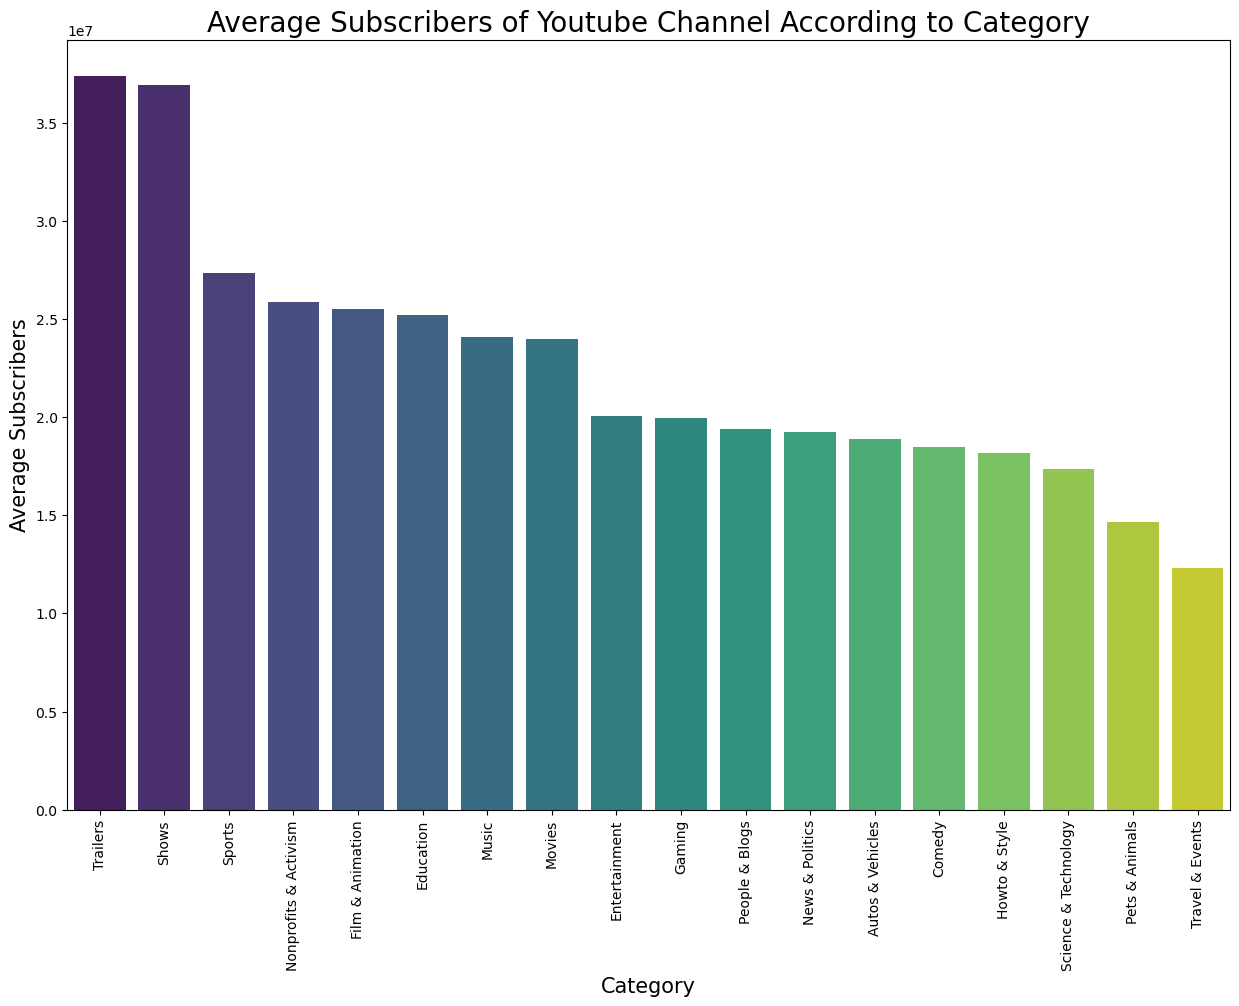

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

category_list= list(df.Category.unique())
sub = []

for i in category_list:
    x = df[df.Category == i]
    mean_sub = x["Subscribers"].mean()
    sub.append(mean_sub)
df_subs=pd.DataFrame({'categorylist':category_list,'subs':sub})
new_index = df_subs.subs.sort_values(ascending = False).index.values
sorted_df_subs = df_subs.reindex(new_index)

plt.figure(figsize=(15,10))
sns.barplot(data = sorted_df_subs, x = "categorylist", y = "subs", palette = "viridis")

plt.xticks(rotation = 90)

plt.xlabel('Category', fontsize = 15)
plt.ylabel('Average Subscribers', fontsize = 15)
plt.title('Average Subscribers of Youtube Channel According to Category',
          fontsize = 20)

## Average Video Count of Youtube Channel According to Category

Text(0.5, 1.0, 'Average Video Count of Youtube Channel According to Category')

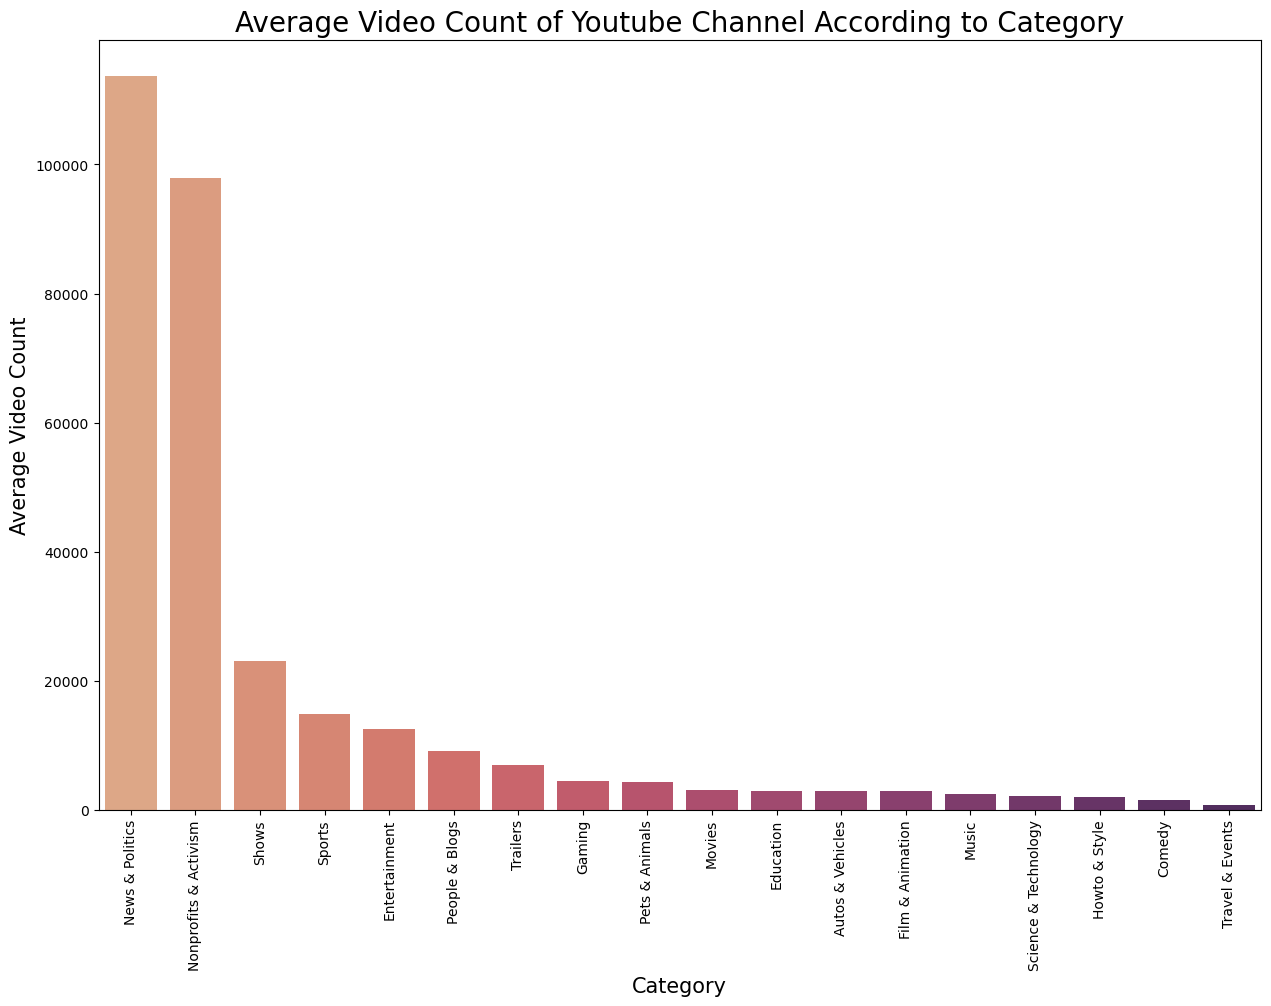

In [14]:
category_list= list(df.Category.unique())
v_count = []

for i in category_list:
    x = df[df.Category == i]
    mean_count = x["Video Count"].mean()
    v_count.append(mean_count)
df_count=pd.DataFrame({'categorylist':category_list,'VideoCount': v_count})
new_index1 = df_count.VideoCount.sort_values(ascending = False).index.values
sorted_df_count = df_count.reindex(new_index1)

plt.figure(figsize=(15,10))
sns.barplot(data = sorted_df_count, x = "categorylist", y = "VideoCount", palette ="flare")

plt.xticks(rotation = 90)

plt.xlabel('Category', fontsize = 15)
plt.ylabel('Average Video Count', fontsize = 15)
plt.title('Average Video Count of Youtube Channel According to Category',fontsize = 20)

## Top 10 Gaming Youtube Channels with The Most Subscribers

In [15]:
df_game = df[df.Category == 'Gaming']
df_game.head()

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
6,PewDiePie,111000000,28851883250,4694,Gaming,2010
45,JuegaGerman,47000000,14143277535,2017,Gaming,2013
47,Fernanfloo,45600000,10146422791,542,Gaming,2011
56,A4,43900000,19946220349,709,Gaming,2014
67,elrubiusOMG,40400000,7581423100,711,Gaming,2011


Text(0.5, 1.0, 'Top 10 Gaming Youtube Channels with The Most Subscribers')

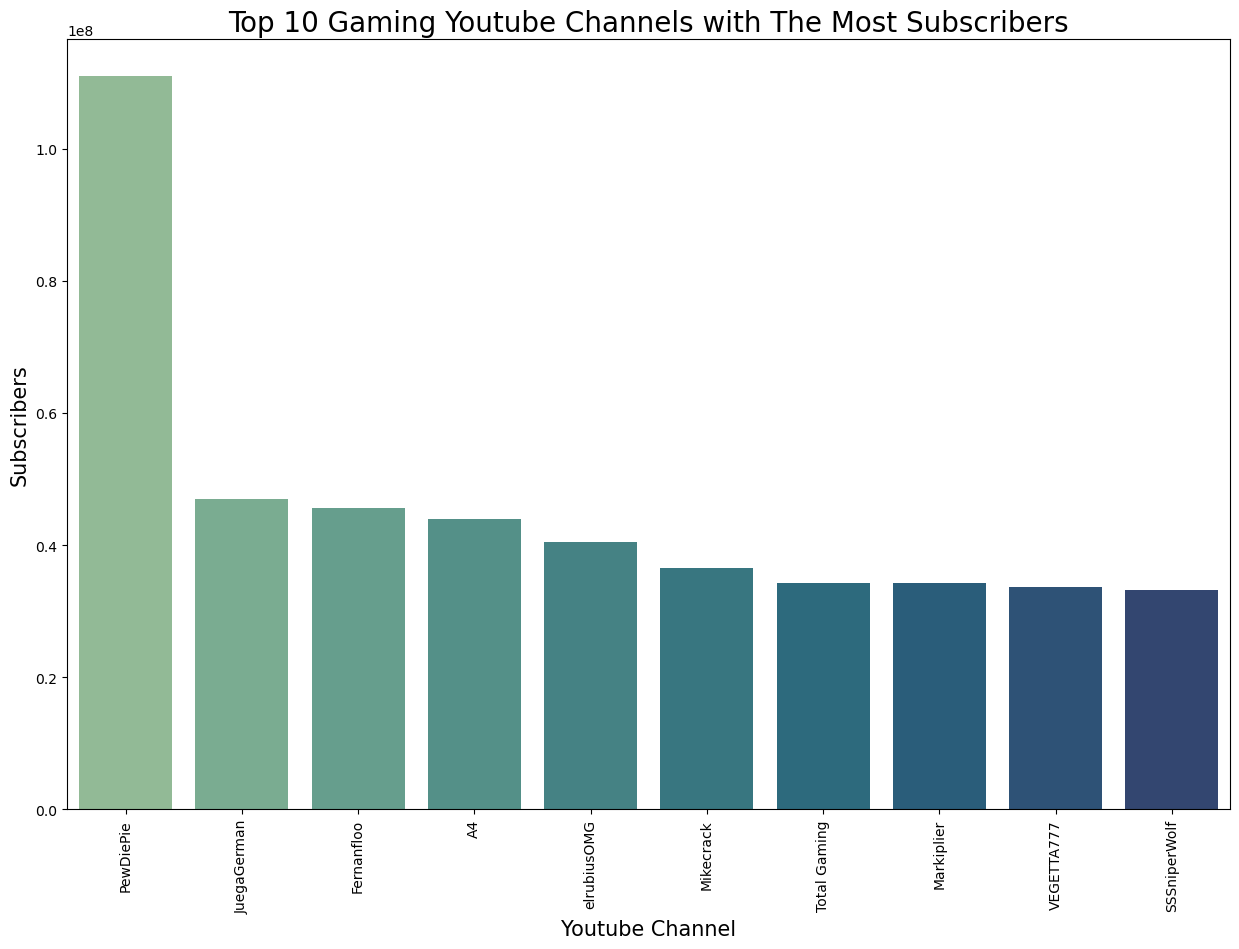

In [16]:
new_index1= df_game.Subscribers.sort_values(ascending = False).index.values
sorted_df_game = df_game.reindex(new_index1)
sorted_df_game_10 = sorted_df_game[:10]

plt.figure(figsize=(15,10))
sns.barplot(sorted_df_game_10, x = "Youtube Channel", y= "Subscribers",
            palette = "crest")

plt.xticks(rotation = 90)
plt.xlabel("Youtube Channel", fontsize = 15)
plt.ylabel("Subscribers", fontsize = 15)
plt.title("Top 10 Gaming Youtube Channels with The Most Subscribers", fontsize =20)

## Top 10 Music Youtube Channels with The Most Video Count

In [17]:
df_music = df[df.Category == 'Music']
df_music.head()

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,T-Series,234000000,212900271553,18515,Music,2006
12,Zee Music Company,91600000,53352597784,7530,Music,2014
18,BANGTANTV,73100000,19240057894,2090,Music,2012
19,Justin Bieber,70800000,29598652357,249,Music,2007
20,HYBE LABELS,69600000,25947702825,1070,Music,2008


Text(0.5, 1.0, 'Top 10 Music Youtube Channels with The Most Video Count')

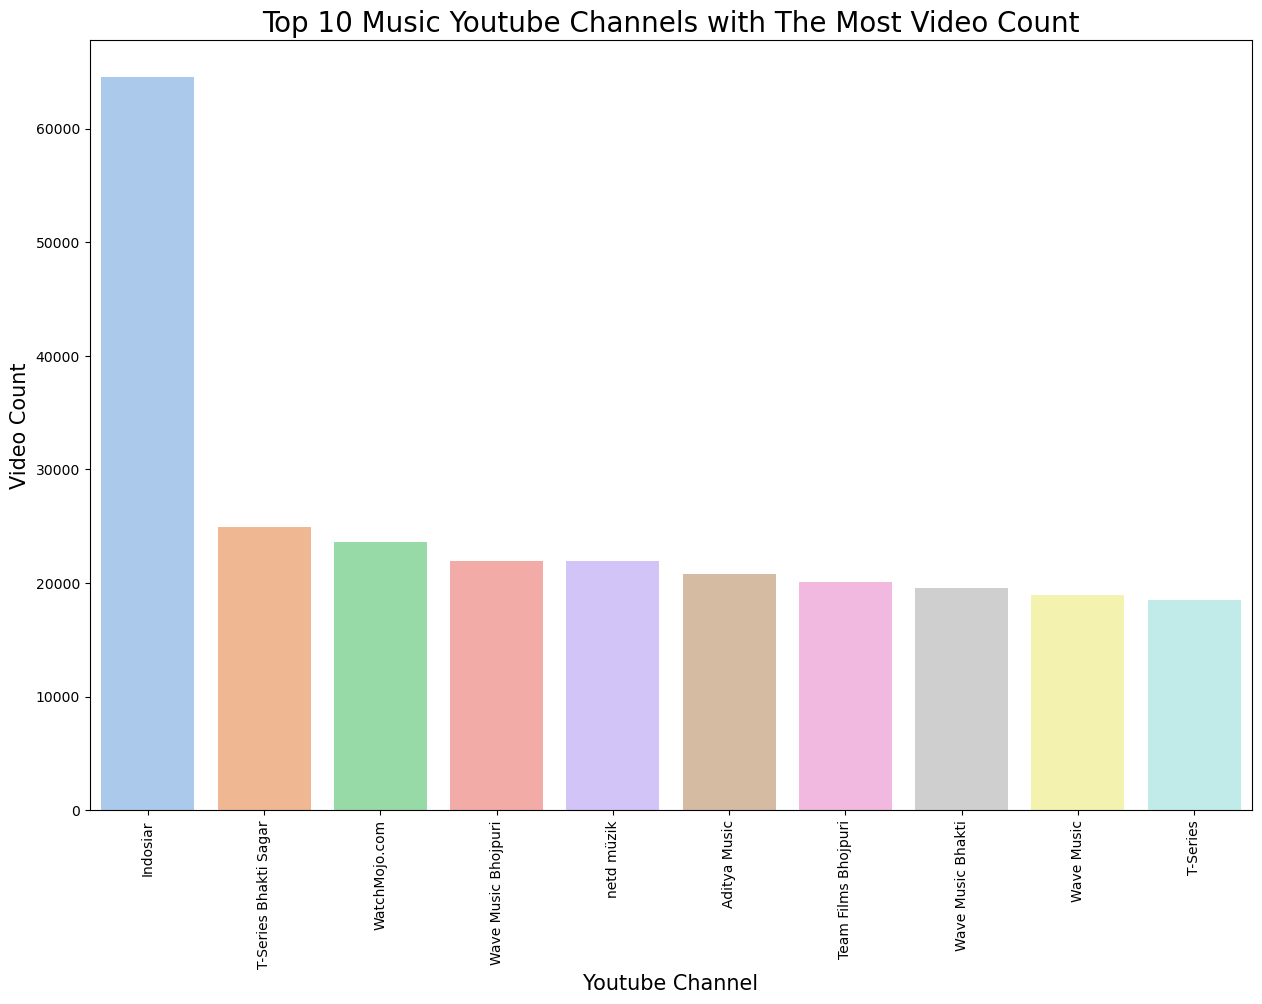

In [18]:
new_index_ = df_music["Video Count"].sort_values(ascending = False).index.values
sorted_df_music = df_music.reindex(new_index_)
sorted_df_music_10 = sorted_df_music[:10]

plt.figure(figsize=(15,10))

sns.barplot(sorted_df_music_10, x="Youtube Channel", y="Video Count", palette = "pastel")

plt.xticks(rotation = 90)
plt.xlabel("Youtube Channel", fontsize = 15)
plt.ylabel("Video Count", fontsize = 15)
plt.title("Top 10 Music Youtube Channels with The Most Video Count", fontsize =20)

## Box Plot for Education Youtube Channel

In [19]:
df_edu = df[df.Category == "Education"]
df_edu.head()

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
2,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
23,Pinkfong Baby Shark - Kids' Songs & Stories,64600000,35934421688,2599,Education,2011
25,ChuChu TV Nursery Rhymes & Kids Songs,61100000,41904239949,531,Education,2013
42,BillionSurpriseToys - English Kids Songs & Car...,49700000,8662901485,637,Education,2013
43,Infobells - Hindi,48400000,27621598218,514,Education,2014


<AxesSubplot:xlabel='Video Views'>

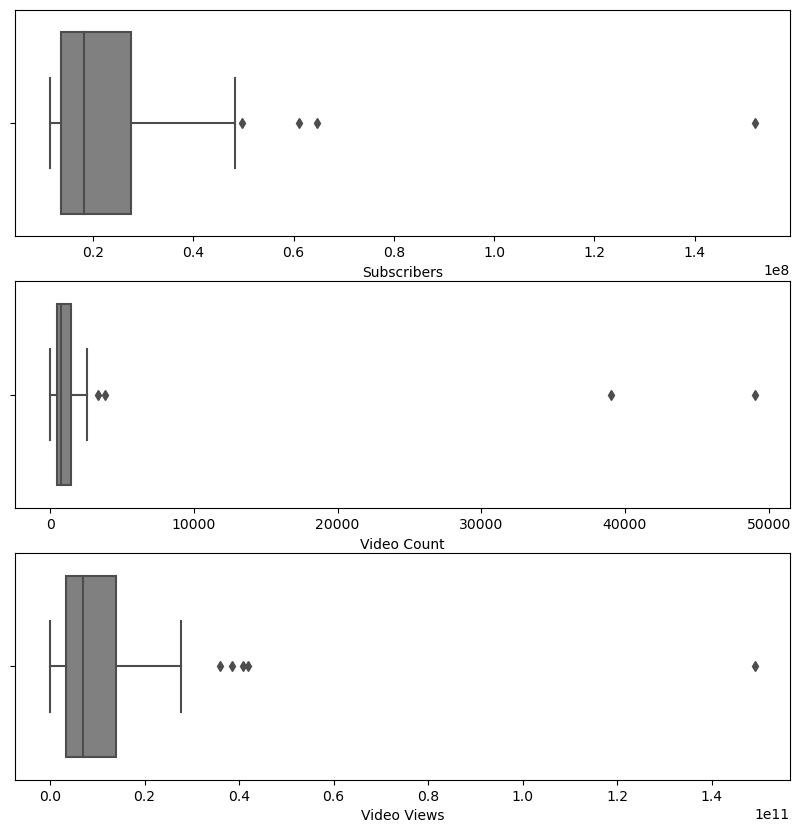

In [20]:
plt.figure(figsize = (10,10))


plt.subplot(3, 1, 1)
sns.boxplot(df_edu , x="Subscribers", color = "grey")


plt.subplot(3, 1, 2)
sns.boxplot(df_edu , x="Video Count", color = "grey")


plt.subplot(3, 1, 3)
sns.boxplot(df_edu , x="Video Views", color = "grey")

## Finding relation between subscribers, video count and video views using heatmap

<AxesSubplot:>

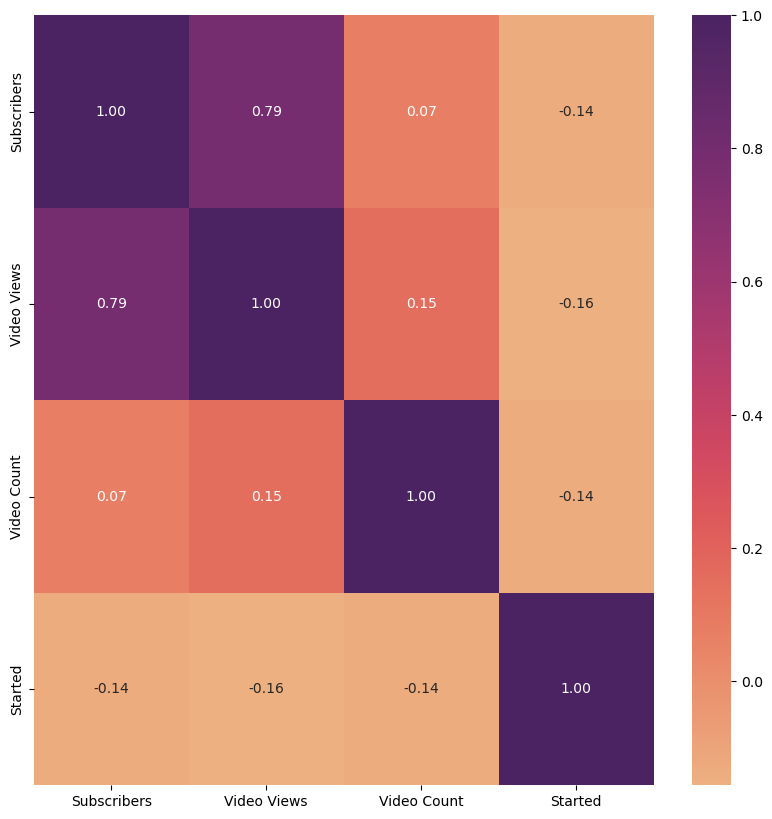

In [21]:
plt.figure(figsize = (10,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap ="flare" )